In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


In [2]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes_df = pd.read_csv(url)


In [3]:

summary_stats = diabetes_df.describe()
print(summary_stats)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

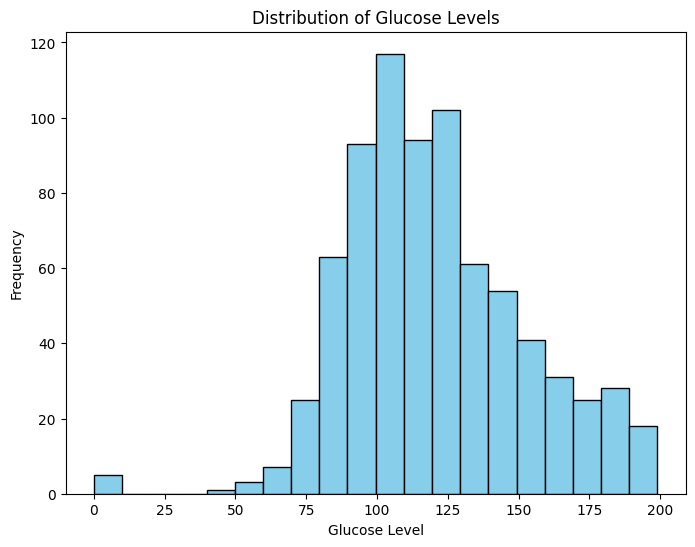

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(diabetes_df["Glucose"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Levels")
plt.show()


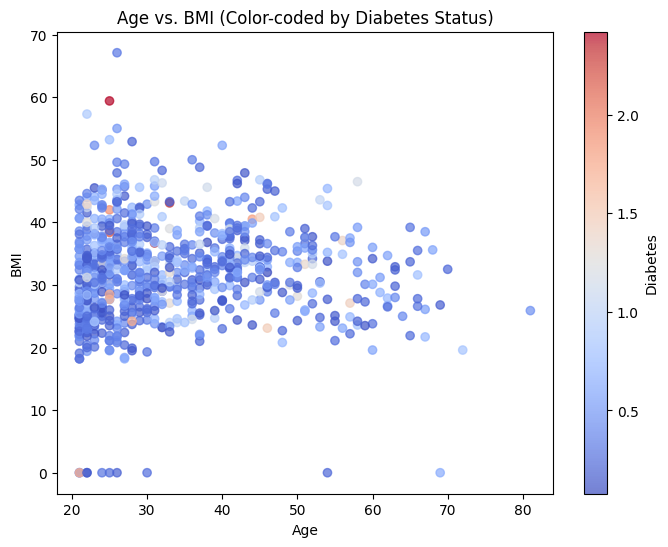

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df["Age"], diabetes_df["BMI"], c=diabetes_df["DiabetesPedigreeFunction"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs. BMI (Color-coded by Diabetes Status)")
plt.colorbar(label="Diabetes")
plt.show()


In [15]:

X = diabetes_df.drop(columns=["DiabetesPedigreeFunction"])
y = diabetes_df["DiabetesPedigreeFunction"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")


Linear Regression MSE: 0.08


In [18]:
y_binary = (y > y.median()).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train_bin, y_train_bin)


y_pred_bin = log_reg.predict(X_test_bin)

accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.59


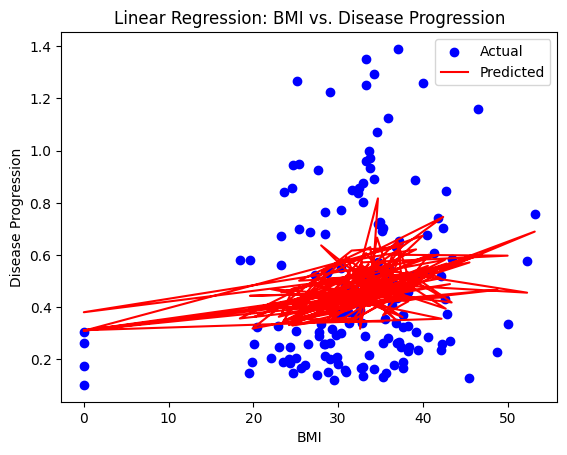

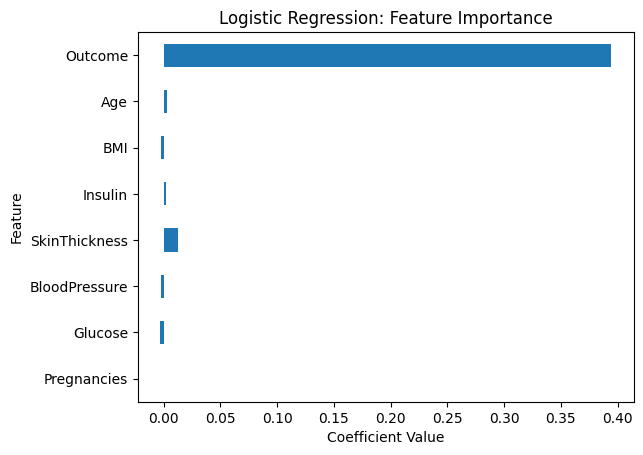

In [22]:

plt.scatter(X_test["BMI"], y_test, color="blue", label="Actual")
plt.plot(X_test["BMI"], y_pred, color="red", label="Predicted")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Linear Regression: BMI vs. Disease Progression")
plt.legend()
plt.show()

log_reg_coefs = pd.Series(log_reg.coef_[0], index=X.columns)
log_reg_coefs.plot(kind="barh")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression: Feature Importance")
plt.show()
